In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
cash = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')
cash.head(10)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
5,2145,100.0,money_back,2020-05-23 20:58:55.129432+00,2020-07-06 03:36:03.023911+00,9489.0,2020-05-24 12:40:33.05491+00,NaN,2020-06-06 22:00:00+00,2020-05-26,2020-07-06 03:36:03.023521+00,regular,NaN,completed,2020-06-12 22:27:04.837525+00,2020-07-06 03:36:03.030904+00
6,3512,100.0,rejected,2020-06-16 17:07:38.452652+00,2020-06-17 10:21:21.364746+00,14631.0,2020-06-17 10:21:21.360742+00,NaN,2020-07-11 23:51:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
9,71,90.0,rejected,2019-12-10 19:51:23.911206+00,2019-12-12 15:06:11.192888+00,897.0,2019-12-12 15:06:11.190299+00,NaN,2019-12-17 19:51:23.910748+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [24]:
# Convert 'created_at' to datetime
cash['created_at'] = pd.to_datetime(cash['created_at'])

# Create month and cohorte column
cash.sort_values(by='user_id', inplace=True)
cash['month'] = cash['created_at'].dt.to_period('M')
cash['cohortes'] = cash.groupby('user_id')['month'].transform('min')
cash[['cohortes', 'month', 'user_id']].head(10)

/tmp/ipykernel_162416/476692163.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['month'] = cash['created_at'].dt.to_period('M')


,cohortes,month,user_id
538,2020-04,2020-04,34.0
91,2019-12,2020-02,35.0
345,2019-12,2020-01,35.0
5298,2019-12,2020-08,35.0
58,2019-12,2019-12,35.0
180,2019-12,2019-12,35.0
6842,2019-12,2020-09,35.0
670,2019-12,2020-03,35.0
1037,2019-11,2020-08,47.0
445,2019-11,2020-04,47.0


In [25]:
table = cash.groupby('cohortes').agg(clientes = ('user_id', 'nunique'))
table

,clientes
cohortes,
2019-11,1
2019-12,204
2020-01,90
2020-02,84
2020-03,69
2020-04,212
2020-05,369
2020-06,1338
2020-07,1294


In [26]:
table_month = cash.groupby(['cohortes', 'month']).agg(clientes = ('user_id', 'nunique')).reset_index()
table_month

,cohortes,month,clientes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,660
79,2020-09,2020-11,20
80,2020-10,2020-10,4694
81,2020-10,2020-11,15


In [27]:
pivot_unitial = table_month.groupby('cohortes').first()
pivot_unitial

,month,clientes
cohortes,,
2019-11,2019-11,1
2019-12,2019-12,204
2020-01,2020-01,90
2020-02,2020-02,84
2020-03,2020-03,69
2020-04,2020-04,212
2020-05,2020-05,369
2020-06,2020-06,1338
2020-07,2020-07,1294


In [28]:
retention = table_month.pivot(index='cohortes', columns='month', values='clientes').div(pivot_unitial['clientes'], axis=0)
retention

month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohortes,,,,,,,,,,,,,
2019-11,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
2019-12,NaN,1.0,0.338235,0.215686,0.274510,0.259804,0.323529,0.289216,0.254902,0.308824,0.205882,0.289216,0.004902
2020-01,NaN,NaN,1.000000,0.211111,0.155556,0.300000,0.255556,0.266667,0.300000,0.233333,0.222222,0.255556,0.011111
2020-02,NaN,NaN,NaN,1.000000,0.523810,0.488095,0.488095,0.452381,0.428571,0.428571,0.297619,0.416667,NaN
2020-03,NaN,NaN,NaN,NaN,1.000000,0.507246,0.463768,0.594203,0.434783,0.405797,0.376812,0.391304,0.014493
2020-04,NaN,NaN,NaN,NaN,NaN,1.000000,0.490566,0.509434,0.396226,0.358491,0.311321,0.278302,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.615176,0.536585,0.452575,0.346883,0.401084,0.008130
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.520927,0.515695,0.403587,0.405082,0.002990
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.499227,0.374034,0.394900,0.005410


<Axes: xlabel='month', ylabel='cohortes'>

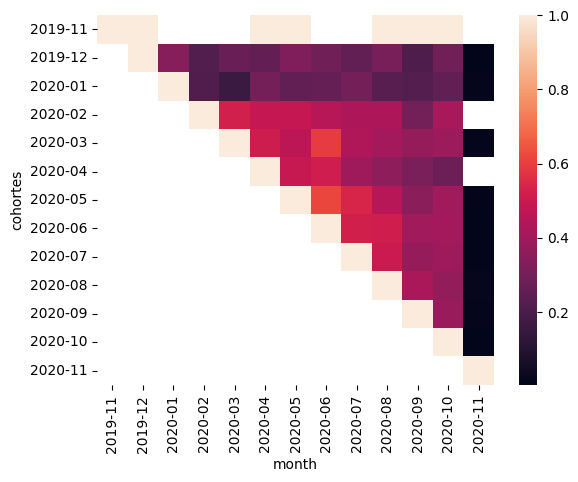

In [29]:
sns.heatmap(retention)

In [30]:
# Take the first operations of each client
first_operations = user_operation.drop_duplicates(subset='user_id')
first_operations['month_creation'] = first_operations['created_at'].dt.to_period('M')
first_operations.groupby('month_creation')['user_id']
first_operations = pd.DataFrame(first_operations)
first_operations[['user_id','month_creation']].head(25).sort_values(by='month_creation')

NameError: name 'user_operation' is not defined

In [ ]:
cohortes = first_operations[['user_id','month_creation']].sort_values(by='user_id')
cohortes.reset_index(drop=True, inplace=True)
cohortes

,user_id,month_creation
0,34.0,2020-04
1,35.0,2019-12
2,47.0,2019-11
3,52.0,2019-12
4,53.0,2019-12
...,...,...
10793,103425.0,2020-11
10794,103437.0,2020-11
10795,103496.0,2020-11
10796,103503.0,2020-11


/tmp/ipykernel_162416/4181489581.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['month_creation'] = cash['created_at'].dt.to_period('M')


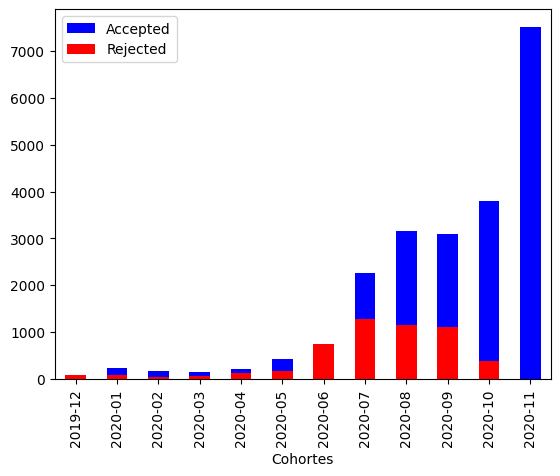

Acepted: month_creation
2019-11          NaN
2019-12    65.652174
2020-01    52.840909
2020-02    67.515924
2020-03    73.429952
2020-04    71.291866
2020-05    77.028886
2020-06    66.859174
2020-07    59.702437
2020-08    62.847896
2020-09    70.647028
2020-10    94.941427
2020-11    97.810219
Freq: M, Name: user_id, dtype: float64


In [ ]:
cash['month_creation'] = cash['created_at'].dt.to_period('M')
cohortes_first = cash.groupby('month_creation')['user_id'].count()
cohortes_first_rejected = cash[cash['status'] == 'rejected'].groupby('month_creation')['user_id'].count()
cohortes_first.plot(kind='bar', color='blue', label='Accepted')
cohortes_first_rejected.plot(kind='bar', color='red', label='Rejected')
plt.xlabel('Cohortes')
plt.legend()
plt.show()
print(f'Acepted: {100 - cohortes_first_rejected / cohortes_first * 100}')

In [ ]:
deleted_account = cash.groupby('deleted_account_id')['id'].count()
deleted_account_list = list(pd.DataFrame(deleted_account).reset_index()['deleted_account_id'])

<Axes: ylabel='user_id'>

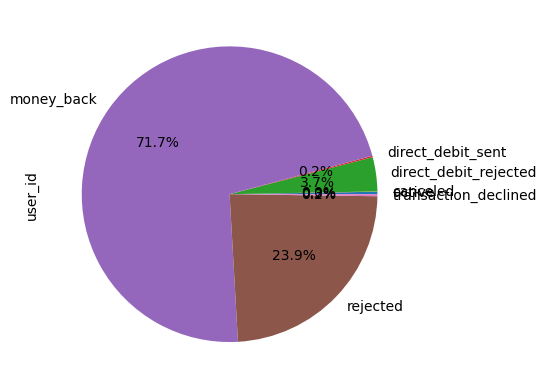

In [ ]:
cash_status = cash.groupby('status')['user_id'].count()
cash_status.plot(kind='pie', autopct='%1.1f%%')

In [ ]:
# Creation a column of converting 'created_at' date as month
cash['month'] = cash['created_at'].dt.to_period('M')

C:\Users\ivani\AppData\Local\Temp\ipykernel_3948\2155834006.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['month'] = cash['created_at'].dt.to_period('M')


In [ ]:
cash[['user_id', 'month', 'month_creation']]

,user_id,month,month_creation
538,34.0,2020-04,2020-04
91,35.0,2020-02,2020-02
345,35.0,2020-01,2020-01
5298,35.0,2020-08,2020-08
58,35.0,2019-12,2019-12
...,...,...,...
23922,NaN,2020-10,2020-10
23925,NaN,2020-10,2020-10
23929,NaN,2020-10,2020-10
23940,NaN,2020-10,2020-10


In [ ]:
pivot = cash.pivot_table(values='month_creation', index='month', aggfunc='count')
pivot

,month_creation
month,
2019-11,1
2019-12,289
2020-01,223
2020-02,184
2020-03,244
2020-04,473
2020-05,837
2020-06,2615
2020-07,3601


<Axes: title={'center': 'Monthly cash request status percentage'}, xlabel='Month - Year', ylabel='Percent (%)'>

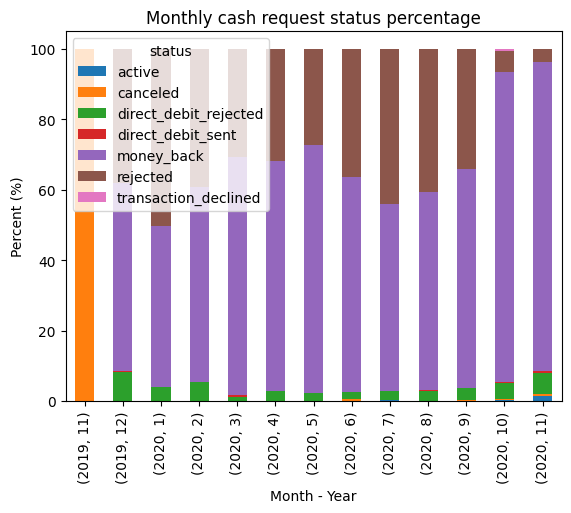

In [36]:
# Percent of cash requests grouped by date and status

status_cash = cash.copy()

status_cash["month"] = status_cash["created_at"].dt.month
status_cash["year"] = status_cash["created_at"].dt.year

gb = status_cash.groupby(["year", "month", "status"]).size().unstack(fill_value=0)

gb = gb.div(gb.sum(axis=1), axis=0) * 100

gb.plot(kind="bar", stacked=True, xlabel="Month - Year", ylabel="Percent (%)", title="Monthly cash request status percentage")